<center>

# EE2703 - Assignment 6 (Part II)

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

# Assignment

- Implement a function that takes the following inputs, and finds the minimum using gradient descent
  - Function definition (one variable)
  - Derivative (also a function definition)
  - Starting point
  - Learning rate
- Repeat the above, but with 2 or more variables (you will be tested with different functions with different numbers of variables depending on what you have implemented)
- Use 3-D plots to show the path taken by a 2 variable optimization

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

## Assumption -
The above packages are imported and are ready to be used. If not, kindly install as the assignment needs the same

## One Dimensional Gradient Descent
The below cell implements the one dimensional gradient descent. 

The approach for gradient descent in one dimension is described below - 

<center>
    $x_{new}$ = $x_{old}$ - $\alpha$ * $\frac{df}{dx}$
</center>

where $\alpha$ is the learning rate. 

The main assumption in this is that gradient descent always moves in the direction of the minima, that is the cost always goes on decreasing. This is true in general as $\frac{df}{dx}$ gives the direction of the gradient at each point and thus x always moves towards the minima provided the learning rate is optimal. 

Learning rate should not be too less as it leads to slower convergence and it should not be too high as well as it might lead to oscillations or instability (divergence of x). 

The stopping criterion for gradient descent being that as error (here, relative error = abs($x_{new}$ - $x_{old}$) ) goes below a certain threshold $\epsilon$, which can be set by the user (default value being $10^{-6}$), we have reached close enough of the needed value. 

The maximum number of iterations can also be set by the user (default value = $10^{6}$) is set to provide a bound on the maximum time permitted to get an output. 

In [2]:
def gradientdescent(f, fprime, xo, learning_rate, tolerance = 1e-6, itermax = 1e6) :
    x = xo                                       #Initial starting point
    for i in range(int(itermax)): 
        xnew = x - learning_rate * fprime(x)     #Forward Propagation using Gradient Descent
        if abs(xnew - x) < tolerance :           #If error less than tolerance break
            break                                #else run again till itermax 
        x = xnew
    return x, f(x)                               #Return xmin and f(xmin)

In [3]:
def f1(x):
    return x**2             #Type the function you need here
def fprime1(x): 
    return 2*x              #Type the derivative here
xo1 = 4                      #Type the initial starting point here
lr1 = 0.1                    #Type the learning rate here
x1D, y1D = gradientdescent(f1,fprime1, xo1, lr1)

In [4]:
print(f"The minimum occurs at point {x1D} and has value {y1D}") #Print the output

The minimum occurs at point 4.903985730770847e-06 and has value 2.404907604760408e-11


## Gradient Descent in Multiple Dimensions
The approach for gradient descent in multiple dimension is described below - 

<center>
    $\overrightarrow{x_{new}}$ = $\overrightarrow{x_{old}}$ - $\alpha$ * $\nabla f$
</center>

where $\alpha$ is the learning rate. 

The main assumption in this is that gradient descent always moves in the direction of the minima, that is the cost always goes on decreasing. This is true in general as $\nabla f$ gives the direction of the gradient at each point and thus $\overrightarrow{x}$ always moves towards the minima provided the learning rate is optimal. 

Learning rate should not be too less as it leads to slower convergence and it should not be too high as well as it might lead to oscillations or instability (divergence of $\overrightarrow{x}$). 

The stopping criterion for gradient descent being that as error (here, relative error = ||($\overrightarrow{x_{new}}$ - $\overrightarrow{x_{old}}$)|| ) goes below a certain threshold $\epsilon$, which can be set by the user (default value being $10^{-6}$), we have reached close enough of the needed value. 

The maximum number of iterations can also be set by the user (default value = $10^{6}$) is set to provide a bound on the maximum time permitted to get an output. 

**The only difference in gradient descent in multiple dimension from one dimension is that each x which originally was a scalar, is now a vector (a python list).** Numpy supports vectorized operations as in each vectorized operation runs highly efficiently and consumes less time due to parallel operation of each component. This is one of the reasons machine learning mostly involves Python than C or C++ which are faster otherwise.

In [5]:
def nDgradientdescent(f, fprime, xo, learning_rate, tolerance = 1e-6, itermax = 1e6):
    x = np.array(xo)                                #Initial starting point
    for i in range(int(itermax)):
        xnew = x - learning_rate * fprime(x)        #Forward propagation using Gradient Descent 
        if np.linalg.norm(xnew - x) < tolerance :   #If error less than tolerance then break
            break                                   #else run again until itermax
        x = xnew                                    #Update x 
    return x, f(x)                                  #Return xmin and f(xmin)
#Note : x here is generalisation of a n-D list 

In [6]:
def f2(x):
    return (x[0]**2)+(x[1]**2)                                       #Type the function here
def fprime2(x):
    return np.array([2*x[0], 2*x[1]])                                #Type the derivative here
x02 = [1, 1]                                                         #Type the initial vector here
lr2 = 0.1                                                            #Type the learning rate here
xnD, ynD = nDgradientdescent(f2,fprime2, x02, lr2)                   #The output is x and y

In [7]:
print(f"The minimum occurs at set of points {xnD} and has value {ynD}")  #Print the output

The minimum occurs at set of points [2.99315535e-06 2.99315535e-06] and has value 1.7917957937422448e-11


## How are these gradient descents different from that used in  ML ?
In Machine Learning, there is a notion of a cost function defined for a particular function. For example, the Mean Squared Error and Binary Cross Entropy Loss are very popular loss functions from the domain of ML used respectively in the domain of regression and logistic regression respectively. 

In the above two gradient descents, there is no formal definition of a cost function as in ML. Moreover, in the above we are using elementary calculus to determine the local minima.

## Two dimensional Visualisation of Gradient Descent

In [8]:
def f3(x):                                #Type the 2D function here
    return (x[0]**2) + (x[1]**2) 
def fprime3(x):
    return np.array([2*x[0], 2*x[1]])     #Type the partial derivative wrt to x and y respectively here
x03 = [1, 1]                              #Type the initial starting point here
lr3 = 0.1                                 #Type the learning rate here

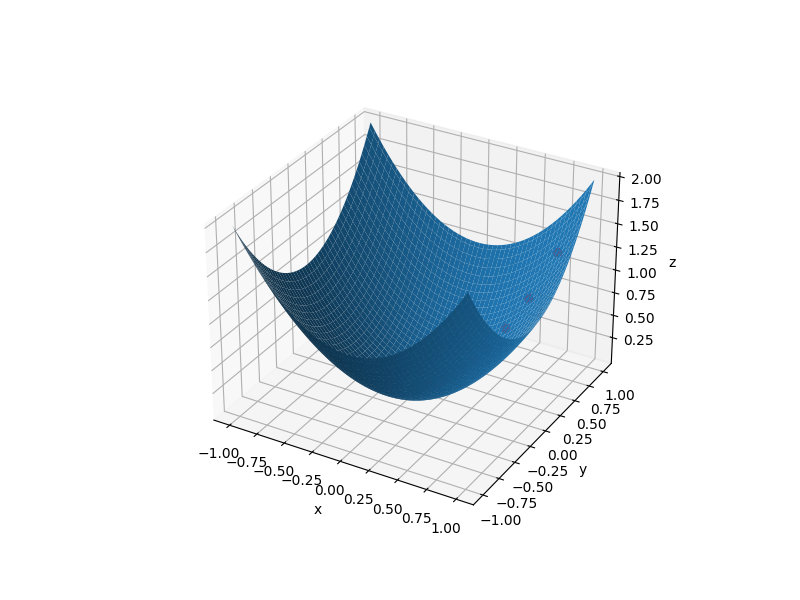

In [9]:
fig = plt.figure(figsize = (8,6))            #Created figure
ax = fig.add_subplot(projection = '3d')      #Created 3d axis
x = np.linspace(-1,1,100)                    #Created 100 x points
y = np.linspace(-1,1,100)                    #Created 100 y points
X, Y = np.meshgrid(x,y)                      #Created mesh having 100 x points and 100 y points X and Y have 100 * 100 points now
Z = np.zeros((100, 100))                     #Create output matrix Z
for i in range(len(x)) :
    for j in range(len(y)) :
        Z[i][j] = f3([X[i][j], Y[i][j]])      #Set values of Z 
ax.set_xlabel('x')                           #Set x axis name
ax.set_ylabel('y')                           #Set y axis name
ax.set_zlabel('z')                           #Set z axis name
ax.plot_surface(X,Y,Z)                       #Plots surface Z = f(X,Y)
xall, yall, zall = [], [], []
lnall,  = ax.plot([], [], [], 'ro')          #Plots the points that have been checked in red dot
lngood, = ax.plot([], [], [], 'go', markersize=10) #Plots the current point being checked in green dot

def singlestep(frame):
    global x03, lr3
    x = np.array(x03)
    xnew = x - lr3 * fprime3(x)              #Forward Propagation using Gradient Descent           
    x03 = xnew                               #Update next start point
    xall.append(xnew[0])
    yall.append(xnew[1])
    zall.append(f3(xnew))
    lnall.set_data_3d(xall, yall, zall)     #Plot the red point
    lngood.set_data_3d(xnew[0], xnew[1], f3(xnew)) #Plot the green point
    return lngood,

ani= FuncAnimation(fig, singlestep, frames=range(100), interval=1000, repeat=False)
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani.save('GradientDescent3D.mp4', writer=writervideo) #Video of the Gradient Descent Approach
plt.show()

The above cell animates the movement of the initial point in the direction of the steepest fall (gradient descent). The red dot shows the position of the previous dot while the green dot shows the position of the current dot. As mentioned earlier, if the learning rate is chosen optimally, the method will always move in a direction towards the local minima. 